In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


All outputs will be saved in:
  /users/htasnim/simreef/simreef_outputs/multi_property_results

[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/01/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/02/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/03/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/04/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/05/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/06/results/population_stats/population_summary.csv
[social] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121791_social/07/r

[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/08/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/09/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/10/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/11/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/12/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/13/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4121821_scared/14/results/population_stats/population_summary.csv
[scared] Loaded: /users/htasnim/simreef/simreef_

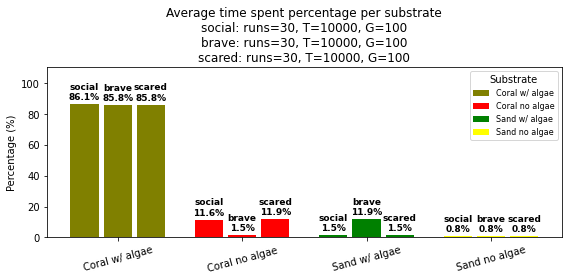

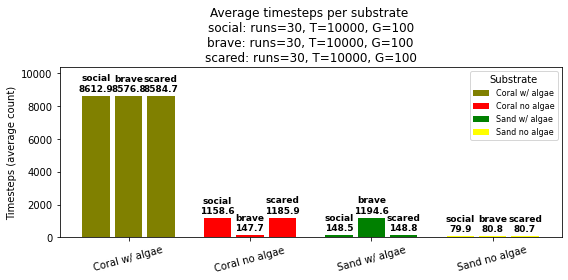


Saved aggregated summary for all properties to: /users/htasnim/simreef/simreef_outputs/multi_property_results/population_summary_avg_aggregated_all_properties.csv


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === Properties & base directories ===
property_base_dirs = {
    "social":   os.path.expanduser("~/simreef/simreef_outputs/simreef_array_4121791_social"),
    "brave": os.path.expanduser("~/simreef/simreef_outputs/simreef_array_4121851_brave"),
    "scared": os.path.expanduser("~/simreef/simreef_outputs/simreef_array_4121821_scared"),
    # Add more like:
    # "scaredy": os.path.expanduser("~/simreef/simreef_outputs/simreef_array_XXXXX"),
}

# === Output directory (FIXED NAME) ===
output_root = os.path.expanduser(
    "~/simreef/simreef_outputs/multi_property_results"
)
os.makedirs(output_root, exist_ok=True)
print(f"All outputs will be saved in:\n  {output_root}\n")

# Relative path from each run folder to the population_summary.csv
relative_csv_path = os.path.join("results", "population_stats", "population_summary.csv")

output_prefix = "population_summary_avg"  # base name for saved figures

# === Columns & labels ===
percent_labels = [
    "Coral w/ algae",
    "Coral no algae",
    "Sand w/ algae",
    "Sand no algae",
]

percent_columns = [
    "coral_w_algae_percent",
    "coral_no_algae_percent",
    "sand_w_algae_percent",
    "sand_no_algae_percent",
]

timestep_labels = percent_labels  # same order
timestep_columns = [
    "coral_w_algae_timesteps",
    "coral_no_algae_timesteps",
    "sand_w_algae_timesteps",
    "sand_no_algae_timesteps",
]

# substrate colors – MUST stay consistent across properties
substrate_colors = ["olive", "red", "green", "yellow"]

# === Helper: load and aggregate one property ===
def load_property_summary(prop_name, base_dir):
    rows = []

    for entry in sorted(os.listdir(base_dir)):
        run_dir = os.path.join(base_dir, entry)
        if not os.path.isdir(run_dir):
            continue

        # If you want to restrict to numeric folder names like "01", "02", uncomment:
        # if not entry.isdigit():
        #     continue

        csv_path = os.path.join(run_dir, relative_csv_path)

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                if not df.empty:
                    row = df.iloc[0].copy()
                    row["property"] = prop_name
                    rows.append(row)
                    print(f"[{prop_name}] Loaded: {csv_path}")
                else:
                    print(f"[{prop_name}] WARNING: {csv_path} is empty.")
            except Exception as e:
                print(f"[{prop_name}] ERROR reading {csv_path}: {e}")
        else:
            print(f"[{prop_name}] Missing: {csv_path}")

    if not rows:
        raise RuntimeError(
            f"No population_summary.csv files found for property '{prop_name}'. "
            f"Check base_dir and paths."
        )

    summary_df = pd.DataFrame(rows)
    print(f"[{prop_name}] Number of runs aggregated: {len(summary_df)}")

    # Compute averages
    avg_percent_values = summary_df[percent_columns].mean()
    avg_timestep_values = summary_df[timestep_columns].mean()

    avg_initial_algae = summary_df["initial_algae"].mean()
    avg_final_algae = summary_df["final_algae"].mean()
    avg_difference = summary_df["difference"].mean()
    avg_reduction_percent = summary_df["reduction_percent"].mean()

    # Assume total_timesteps and grazer_count are constant per run for this property
    #total_timesteps_value = summary_df["total_timesteps"].iloc[0]
    #grazer_count_value = summary_df["grazer_count"].iloc[0]

    #different runs
    total_timesteps_value = int(pd.to_numeric(summary_df["total_timesteps"]).mode().iloc[0])
    grazer_count_value    = int(pd.to_numeric(summary_df["grazer_count"]).mode().iloc[0])

    metrics = {
        "n_runs": len(summary_df),
        "avg_percent_values": avg_percent_values,
        "avg_timestep_values": avg_timestep_values,
        "avg_initial_algae": avg_initial_algae,
        "avg_final_algae": avg_final_algae,
        "avg_difference": avg_difference,
        "avg_reduction_percent": avg_reduction_percent,
        "total_timesteps": total_timesteps_value,
        "grazer_count": grazer_count_value,
    }

    return summary_df, metrics

def case_summary_text(props, property_metrics):
    lines = []
    for prop in props:
        m = property_metrics[prop]
        lines.append(
            f"{prop}: runs={m['n_runs']}, "
            f"T={int(m['total_timesteps'])}, "
            f"G={int(m['grazer_count'])}"
        )
    return "\n".join(lines)



# === Load all properties ===
all_summaries = []
property_metrics = {}  # prop -> metrics dict

for prop, base_dir in property_base_dirs.items():
    summary_df_prop, metrics = load_property_summary(prop, base_dir)
    all_summaries.append(summary_df_prop)
    property_metrics[prop] = metrics

combined_summary_df = pd.concat(all_summaries, ignore_index=True)

props = list(property_metrics.keys())
num_props = len(props)

# === Plot 1: Average Percentages (grouped by substrate, consistent colors) ===
plt.figure(figsize=(8, 4))

indices = np.arange(len(percent_labels))  # one index per substrate

group_width = 0.8
slot_width = group_width / num_props
inner_gap = 0.85   # smaller = more gap

bar_width = slot_width * inner_gap

# For text offset
max_percent_val = max(
    property_metrics[prop]["avg_percent_values"][col]
    for prop in props
    for col in percent_columns
)

for p_idx, prop in enumerate(props):
    metrics = property_metrics[prop]
    avg_percent_values = metrics["avg_percent_values"]

    for s_idx, col in enumerate(percent_columns):
        val = avg_percent_values[col]
        # center bars around each substrate index
        x_base = indices[s_idx]
        x_pos = x_base + (p_idx - (num_props - 1) / 2) * slot_width

        plt.bar(
            x_pos,
            val,
            width=bar_width,
            color=substrate_colors[s_idx],
        )

        # Property name big & bold on top of each bar
        plt.text(
            x_pos,
            val + 0.02 * max_percent_val,
            f"{prop}\n{val:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold",
        )

summary_line = case_summary_text(props, property_metrics)
plt.xticks(indices, percent_labels, rotation=15)
plt.ylabel("Percentage (%)")
plt.ylim(0, 110)

plt.title("Average time spent percentage per substrate\n" + summary_line)

# Legend by substrate (color meaning)
legend_handles = [
    Patch(facecolor=substrate_colors[i], label=percent_labels[i])
    for i in range(len(percent_labels))
]
plt.legend(handles=legend_handles, title="Substrate", fontsize=8)

plt.tight_layout()
plt.savefig(
    os.path.join(output_root, f"{output_prefix}_percentages_multi_property.pdf"),
    dpi=300,
)
plt.show()

# === Plot 2: Average Timesteps Counts (grouped by substrate, consistent colors) ===
plt.figure(figsize=(8, 4))

# For text offset and y-limit
max_timestep_val = max(
    property_metrics[prop]["avg_timestep_values"][col]
    for prop in props
    for col in timestep_columns
)

for p_idx, prop in enumerate(props):
    metrics = property_metrics[prop]
    avg_timestep_values = metrics["avg_timestep_values"]

    for s_idx, col in enumerate(timestep_columns):
        val = avg_timestep_values[col]
        x_base = indices[s_idx]
        x_pos = x_base + (p_idx - (num_props - 1) / 2) * slot_width


        plt.bar(
            x_pos,
            val,
            width=bar_width,
            color=substrate_colors[s_idx],
        )

        plt.text(
            x_pos,
            val + 0.02 * max_timestep_val,
            f"{prop}\n{val:.1f}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold",
        )

summary_line = case_summary_text(props, property_metrics)
plt.xticks(indices, timestep_labels, rotation=15)
plt.ylabel("Timesteps (average count)")
plt.ylim(0, max_timestep_val * 1.2 if max_timestep_val > 0 else 1)

plt.title("Average timesteps per substrate \n"+ summary_line)
 
plt.legend(handles=legend_handles, title="Substrate", fontsize=8)

plt.tight_layout()
plt.savefig(
    os.path.join(output_root, f"{output_prefix}_timesteps_multi_property.pdf"),
    dpi=300,
)
plt.show()



# === Save aggregated CSV for all properties ===
summary_output_path = os.path.join(
    output_root, f"{output_prefix}_aggregated_all_properties.csv"
)
combined_summary_df.to_csv(summary_output_path, index=False)
print(f"\nSaved aggregated summary for all properties to: {summary_output_path}")
